<a href="https://colab.research.google.com/github/dreg601/test_task_bee/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B8%D0%BB%D0%B0%D0%B9%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт всех основных библиотек.

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns

Создание дата-фреймов.

In [11]:
df_f = pd.read_csv( 'service_fraud.csv')
display(df_f)

,time_key_dt,client_id_serv,channel
0,2022-07-01,T644930978638,Alternative
1,2021-03-01,K68685073049356,Alternative
2,2021-03-01,G68827227560004,Alternative
3,2021-03-01,K64784666024594,Alternative
4,2021-06-01,T68631562544549,Alternative
...,...,...,...
2695,2021-10-01,K68684434750128,Franchise
2696,2021-10-01,K68988408970865,Franchise
2697,2021-10-01,B68723952753340,Franchise
2698,2021-09-01,V69091217774455,Franchise


In [12]:
df_r = pd.read_csv( 'service_revenue.csv')
display(df_r)

,time_key_dt,client_id_serv,revenue
0,2021-04-01,V644328120231,382.716671
1,2021-04-01,K69097158072550,377.430195
2,2021-04-01,S65849265234609,682.289684
3,2021-04-01,U68598416040936,60.955957
4,2021-04-01,S68677155648563,434.013901
...,...,...,...
1569574,2022-08-01,G68828188937003,131.224172
1569575,2022-08-01,G68827342636920,243.777353
1569576,2022-08-01,G6462330265509,160.430723
1569577,2022-08-01,G68996708843421,202.490244


In [13]:
df_ss = pd.read_csv( 'service_subs.csv')
display(df_ss)

,time_key_dt,client_id_serv,segment,sales_ind
0,2021-01-01,A64309659750,1,old
1,2021-01-01,A643510019114,1,old
2,2021-01-01,A643511179115,1,old
3,2021-01-01,A644422566295,1,old
4,2021-01-01,A644424051299,1,old
...,...,...,...,...
1569616,2022-08-01,Y68891668339382,1,old
1569617,2022-08-01,Y68999713143558,1,old
1569618,2022-08-01,Y69119713445911,1,old
1569619,2022-08-01,Y69136672946347,1,old


In [14]:
df_ts = pd.read_csv( 'technology_subs.csv')
display(df_ts)

,date_key_src,client_id_tech,combo_ind,client_id_serv
0,2022-02-01,A694897209,1,A64955227227421
1,2021-06-01,A694898225,1,A64900848624998
2,2021-07-01,A694900227,1,A68699999951359
3,2021-10-01,A694902219,1,A64955426727513
4,2022-05-01,A694903225,0,NaN
...,...,...,...,...
1000963,2022-03-01,Y73365450963,1,Y65721967133991
1000964,2021-02-01,Y73365647990,1,Y65428449932826
1000965,2022-06-01,Y73365650710,1,Y6454617586348
1000966,2022-05-01,Y73365650814,1,Y64948428126616


Первый вопрос, клиенты service

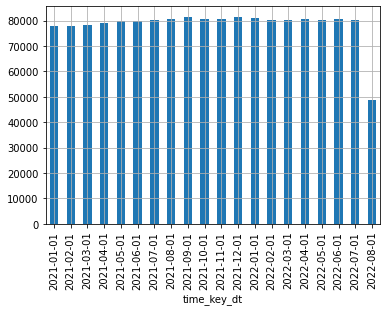

In [73]:
df_ss.groupby(by = ['time_key_dt'])['client_id_serv'].count().plot(kind = 'bar', grid= True)

Первый вопрос, клиенты Tech

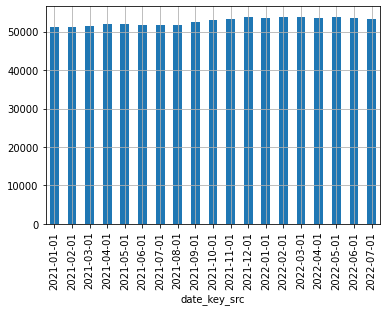

In [34]:
df_ts.groupby(by = ['date_key_src'])['client_id_tech'].count().plot(kind = 'bar', grid= True)

Первый вопрос, клиенты Combo

In [41]:
df_ts_1 = df_ts[df_ts.combo_ind == 1].sort_values('date_key_src')
display(df_ts_1)

,date_key_src,client_id_tech,combo_ind,client_id_serv
697039,2021-01-01,S69948616365,1,S64735846419736
732357,2021-01-01,S72751831304,1,S64751203421760
875138,2021-01-01,V70003321382,1,V68634297444624
875115,2021-01-01,V70003221381,1,V6450891411533
676690,2021-01-01,S6954123107,1,S68885443363104
...,...,...,...,...
771384,2022-07-01,T6986438651,1,T68657379347555
909643,2022-07-01,V70129628894,1,V6451412712374
909644,2022-07-01,V70129628898,1,V69854971078973
771439,2022-07-01,T6986448654,1,T64981312630164


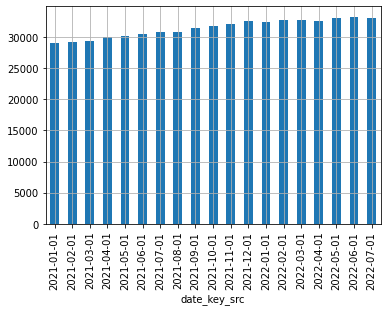

In [42]:
df_ts_1.groupby(by = ['date_key_src'])['client_id_tech'].count().plot(kind = 'bar', grid= True)

Второй вопрос, подготовка данных (объединение таблиц)

In [44]:
df_r_1 = df_r.merge(df_ss)
display(df_r_1)

,time_key_dt,client_id_serv,revenue,segment,sales_ind
0,2021-04-01,V644328120231,382.716671,1,old
1,2021-04-01,K69097158072550,377.430195,1,old
2,2021-04-01,S65849265234609,682.289684,1,old
3,2021-04-01,U68598416040936,60.955957,New,old
4,2021-04-01,S68677155648563,434.013901,1,old
...,...,...,...,...,...
1569574,2022-08-01,G68828188937003,131.224172,1,old
1569575,2022-08-01,G68827342636920,243.777353,New,sales
1569576,2022-08-01,G6462330265509,160.430723,2,old
1569577,2022-08-01,G68996708843421,202.490244,1,old


Второй вопрос, насколько стабильно пользуются (количество полей по сегментам)

1      1167244
2       316421
New      85914
Name: segment, dtype: int64

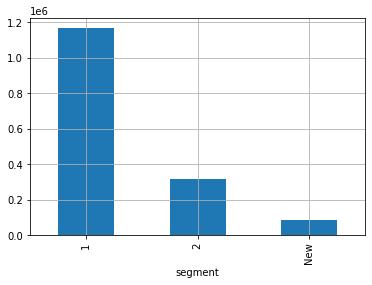

In [87]:
df_r_1.groupby(by = ['segment'])['client_id_serv'].count().plot(kind = 'bar', grid= True),
df_r_1['segment'].value_counts()

Второй вопрос, насколько стабильно пользуются, динамика по месяцам

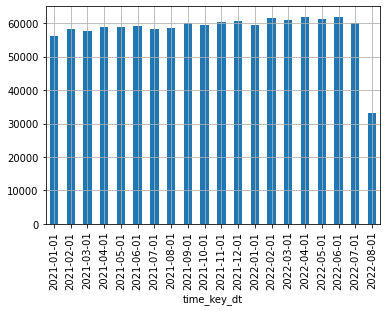

In [88]:
df_r_1[df_r_1.segment == '1'].groupby(by = ['time_key_dt'])['client_id_serv'].count().plot(kind = 'bar', grid= True)

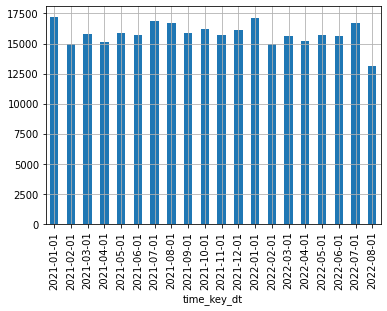

In [89]:
df_r_1[df_r_1.segment == '2'].groupby(by = ['time_key_dt'])['client_id_serv'].count().plot(kind = 'bar', grid= True)

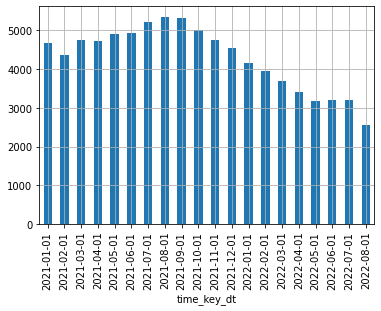

In [90]:
df_r_1[df_r_1.segment == 'New'].groupby(by = ['time_key_dt'])['client_id_serv'].count().plot(kind = 'bar', grid= True)

Второй вопрос, сколько платят (брал среднее значение за месяц)

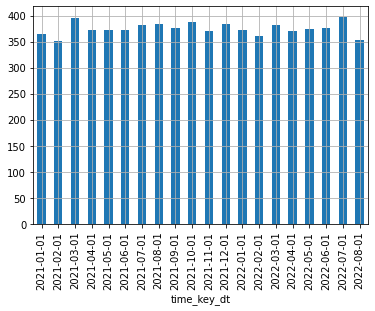

In [91]:
df_r_1[df_r_1.segment == '1'].groupby(by = ['time_key_dt'])['revenue'].mean().plot(kind = 'bar', grid= True)

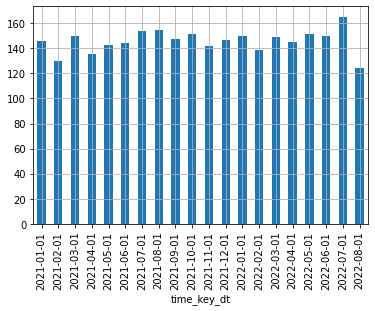

In [92]:
df_r_1[df_r_1.segment == '2'].groupby(by = ['time_key_dt'])['revenue'].mean().plot(kind = 'bar', grid= True)

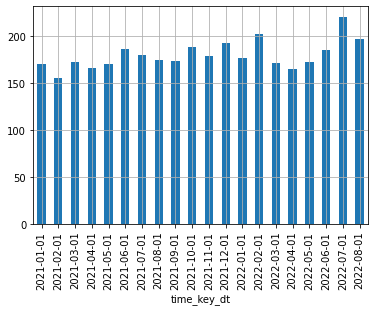

In [93]:
df_r_1[df_r_1.segment == 'New'].groupby(by = ['time_key_dt'])['revenue'].mean().plot(kind = 'bar', grid= True)

Третий вопрос, есть ли среди абонентов combo фрод?

In [118]:
df_f_2 = df_ts_1.merge(df_ss)
display(df_f_2)

,date_key_src,client_id_tech,combo_ind,client_id_serv,time_key_dt,segment,sales_ind
0,2021-01-01,S69948616365,1,S64735846419736,2021-01-01,1,old
1,2021-01-01,S72751831304,1,S64751203421760,2021-01-01,2,old
2,2021-01-01,V70003321382,1,V68634297444624,2021-01-01,1,old
3,2021-01-01,V70003221381,1,V6450891411533,2021-01-01,1,old
4,2021-01-01,S6954123107,1,S68885443363104,2021-01-01,1,old
...,...,...,...,...,...,...,...
571068,2022-07-01,T6986438651,1,T68657379347555,2022-07-01,1,old
571069,2022-07-01,V70129628894,1,V6451412712374,2022-07-01,2,old
571070,2022-07-01,V70129628898,1,V69854971078973,2022-07-01,1,old
571071,2022-07-01,T6986448654,1,T64981312630164,2022-07-01,1,old


In [94]:
df_f_1 = df_ts_1.merge(df_f)
display(df_f_1)

,date_key_src,client_id_tech,combo_ind,client_id_serv,time_key_dt,channel
0,2021-01-01,K70056825958,1,K64653882510990,2021-01-01,Alternative
1,2021-01-01,K69909713327,1,K6456408318613,2021-01-01,Office
2,2021-01-01,K73040239608,1,K6456405398606,2021-01-01,Alternative
3,2021-01-01,I70049025777,1,I68909827764317,2021-01-01,Alternative
4,2021-01-01,S70045025307,1,S64662354811820,2021-01-01,Franchise
...,...,...,...,...,...,...
263,2022-07-01,S70112726722,1,S68589660240610,2022-07-01,Office
264,2022-07-01,T70159031098,1,T64651365110840,2022-07-01,Alternative
265,2022-07-01,T70112026620,1,T644930978638,2022-07-01,Alternative
266,2022-07-01,V70158231070,1,V6452254263436,2022-07-01,Alternative


In [122]:
df_f_3 = df_f_1.merge(df_f_2)
display(df_f_3[df_f_3.sales_ind == 'sales'])

,date_key_src,client_id_tech,combo_ind,client_id_serv,time_key_dt,channel,segment,sales_ind
0,2021-01-01,K70056825958,1,K64653882510990,2021-01-01,Alternative,New,sales
1,2021-01-01,K69909713327,1,K6456408318613,2021-01-01,Office,New,sales
2,2021-01-01,K73040239608,1,K6456405398606,2021-01-01,Alternative,New,sales
3,2021-01-01,I70049025777,1,I68909827764317,2021-01-01,Alternative,New,sales
4,2021-01-01,S70045025307,1,S64662354811820,2021-01-01,Franchise,New,sales
...,...,...,...,...,...,...,...,...
263,2022-07-01,S70112726722,1,S68589660240610,2022-07-01,Office,New,sales
264,2022-07-01,T70159031098,1,T64651365110840,2022-07-01,Alternative,New,sales
265,2022-07-01,T70112026620,1,T644930978638,2022-07-01,Alternative,New,sales
266,2022-07-01,V70158231070,1,V6452254263436,2022-07-01,Alternative,New,sales


In [123]:
df_f_3['channel'].value_counts()

Alternative    212
Office          34
Franchise       22
Name: channel, dtype: int64

Четвертый вопрос, service

In [192]:
df_ts_1[(df_ts_1.combo_ind ==1) & (df_ts_1.date_key_src >= '2021-08-01')].isnull().sum()

date_key_src          0
client_id_tech        0
combo_ind             0
client_id_serv    18233
dtype: int64

За год, отключили service чуть больше 18 тысяч людей.

In [191]:
df_ts_1[(df_ts_1.combo_ind ==1) & (df_ts_1.date_key_src > '2022-04-01')].isnull().sum()

date_key_src         0
client_id_tech       0
combo_ind            0
client_id_serv    5061
dtype: int64

За последние 4 месяца отключили service чуть больше 5 тысяч людей.

Четвертый вопрос, tech.

In [199]:
df_ts_1[(df_ts_1.combo_ind ==1) & (df_ts_1.date_key_src >= '2021-08-01')].count()

date_key_src      388447
client_id_tech    388447
combo_ind         388447
client_id_serv    370214
dtype: int64

In [198]:
df_ts_1[(df_ts_1.combo_ind ==1) & (df_ts_1.date_key_src >= '2021-08-01')].nunique()

date_key_src          12
client_id_tech    384667
combo_ind              1
client_id_serv    370117
dtype: int64

За последний год, tech заказывали чуть более 4 тысяч раз.

In [203]:
df_ts_1[(df_ts_1.combo_ind ==1) & (df_ts_1.date_key_src >= '2022-05-01')].count()

date_key_src      99483
client_id_tech    99483
combo_ind         99483
client_id_serv    94422
dtype: int64

In [201]:
df_ts_1[(df_ts_1.combo_ind ==1) & (df_ts_1.date_key_src >= '2022-05-01')].nunique()

date_key_src          3
client_id_tech    99052
combo_ind             1
client_id_serv    94412
dtype: int64

За последние 4 месяца договор продляли примерно 400 человек.